<a href="https://colab.research.google.com/github/Ninlawat-Ph/sentiment-analysis/blob/master/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Utilities

In [0]:
from tqdm import tqdm_notebook

# Read data

In [0]:
import pandas as pd

lanna = pd.read_csv("data_lanna_en.csv")
lanna = lanna.reset_index()
lanna = lanna.rename(columns={"index": "cid"})

# Sentence Tokenize

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk import sent_tokenize

sentences = []
cids = []
for cid in lanna["cid"]:
    s = sent_tokenize(lanna.loc[cid, "en"])
    sentences = sentences + s
    cids = cids + [cid] * len(s)

# Sentence-level sentiment

In [0]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
!pip install twython

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [0]:
def predict_sentiment(sentence):
  sa = SentimentIntensityAnalyzer()
  sentiment_distribution = sa.polarity_scores(sentence)
  score = sentiment_distribution.get("compound")
  
  if score >= 0.05:
    return "positive"
  elif score <= -0.05:
    return "negative"
  else:
    return "neutral"

In [0]:
sentiments = []
for sentence in tqdm_notebook(sentences, total=len(sentences)):
    sentiments.append(predict_sentiment(sentence))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


# Parsing

In [0]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
from nltk import word_tokenize, pos_tag, RegexpParser

In [0]:
grammar = """NP: {<NN|NNS>+}
                 {<NN|NNS>+<CC><NN|NNS>+}"""
chunker = RegexpParser(grammar)
parse_trees = []
for sentence in sentences:
    parse_trees.append(chunker.parse(pos_tag(word_tokenize(sentence))))

# Extract Noun Phrase

In [0]:
def extract_np(parsed_tree):
    nps = []
    for subtree in parsed_tree.subtrees():
        if subtree.label() == 'NP':
            t = subtree
            t = " ".join(word for word, tag in t.leaves())
            nps.append(t)
    return nps

In [0]:
nps = []
for parse_tree in parse_trees:
    nps.append(extract_np(parse_tree))

# Put information into DataFrame

In [0]:
df = pd.DataFrame({"cids": cids, 
                   "sentences": sentences, 
                   "sentiments": sentiments, 
                   "NP": nps})

In [0]:
df.head()

,cids,sentences,sentiments,NP
0,0,You take very good care of check points too.,positive,"[care, check points]"
1,0,"Make timely treatment Medical expenses, it doe...",neutral,"[treatment, expenses]"
2,0,It feels very good to work with nursing regula...,positive,[regulation]
3,0,A look tidy If relatives Or have a friend at w...,positive,"[look tidy, relatives, friend, work, hospital]"
4,0,Excellent patient care The singers all the time,positive,"[patient care, singers, time]"


# Split dataframe into positive and negative sentiment

In [0]:
pos = df[df["sentiments"] == "positive"].reset_index(drop=True)
pos_words = sum(pos["NP"].tolist(), [])
pos_words = [word.lower() for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

In [0]:
neg = df[df["sentiments"] == "negative"].reset_index(drop=True)
neg_words = sum(neg["NP"].tolist(), [])
neg_words = [word.lower() for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

# Word Cloud Representation

In [0]:
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

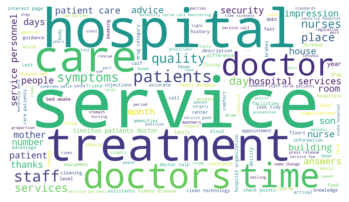

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in poshist.values]
    wordcloud = WordCloud(background_color='white',width=1600, height=900).generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()
vizwordcloud(poshist)

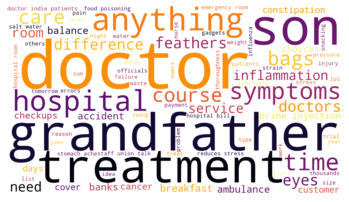

In [0]:
def vizwordcloud(df):
    tuples2 = [tuple(x) for x in neghist.values]
    wordcloud2 = WordCloud(background_color='white',width=1600, height=900,colormap=matplotlib.cm.inferno).generate_from_frequencies(dict(tuples2))
    plt.figure()
    plt.imshow(wordcloud2, interpolation="bilinear")
    plt.axis("off")
    plt.show()
vizwordcloud(neghist)

In [0]:
def plural2singular(word):
  if word == "doctors":
    return "doctor"
  elif word == "patients":
    return "patient"  
  elif word == "nurses":
    return "nurse"
  elif word == "clinics":
    return "clinic"
  elif word == "hospitals":
    return "hospital"
  elif word == "services":
    return "service"
  elif word == "staffs":
    return "staff"
  elif word == "treatments":
    return "treatment"
  elif word == "students":
    return "student"
  elif word == "days":
    return "day"
  else:
    return word

In [0]:
pos_words = [plural2singular(word) for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

neg_words = [plural2singular(word) for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

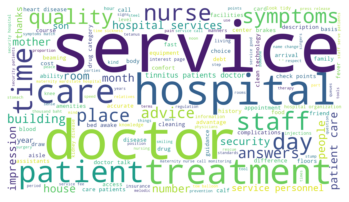

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in poshist.values]
    wordcloud = WordCloud(background_color='white',width=1600, height=900).generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()
vizwordcloud(poshist)

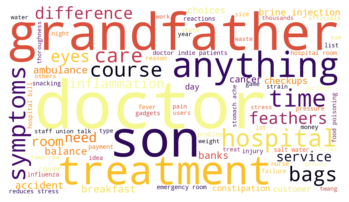

In [0]:
def vizwordcloud(df):
    tuples2 = [tuple(x) for x in neghist.values]
    wordcloud2 = WordCloud(background_color='white',width=1600, height=900,colormap=matplotlib.cm.inferno).generate_from_frequencies(dict(tuples2))
    plt.figure()
    plt.imshow(wordcloud2, interpolation="bilinear")
    plt.axis("off")
    plt.show()
vizwordcloud(neghist)

In [0]:
def groups(word):
    if word in ("doctor", "nurse", "student"):
        return "staff"
    elif word in ("hospital", "clinic", "equipment", "place"):
        return "infrastructure"
    elif word in ("service", "care", "treatment", "surgery", "disease"):
        return "service"
    elif word in ("queue", "appointment","time"):
        return "process"
    elif word in ("cost","prices","banks","welfare rights","pay","expensive"):
        return "finance"
    else:
        return "others"

In [0]:
neghist["category"] = neghist["words"].apply(lambda x: groups(x))
negcount_lanna = neghist.groupby("category").size().reset_index(name="#")
negcount_lanna = negcount_lanna[negcount_lanna["category"] != "others"].reset_index(drop=True)

In [0]:
poshist["category"] = poshist["words"].apply(lambda x: groups(x))
poscount_lanna = poshist.groupby("category").size().reset_index(name="#")
poscount_lanna = poscount_lanna[poscount_lanna["category"] != "others"].reset_index(drop=True)

In [0]:
poscount_lanna

,category,#
0,finance,1
1,infrastructure,3
2,process,2
3,service,5
4,staff,2


In [0]:
negcount_lanna

,category,#
0,finance,1
1,infrastructure,1
2,process,1
3,service,3
4,staff,2


In [0]:
#Radar use mathplotlib below
#import plotly.express as px
#from plotly.offline import download_plotlyjs, init_notebook_mode,  plot

In [0]:
#poscount_lanna
#fig = px.line_polar(poscount_lanna, r="#", theta="category", line_close=True)
#fig.update_traces(fill='toself')
#plot(fig)

In [0]:
#negcount_lanna
#fig = px.line_polar(negcount_lanna, r="#", theta="category", line_close=True)
#fig.update_traces(fill='toself')
#plot(fig)

# data siriraj_piyamaharajkarun

In [0]:
import pandas as pd

siriraj = pd.read_csv("data_siriraj_piyamaharajkarun_en.csv")
siriraj = siriraj.reset_index()
siriraj = siriraj.rename(columns={"index": "cid"})

In [0]:
from nltk import sent_tokenize

sentences = []
cids = []
for cid in siriraj["cid"]:
    s = sent_tokenize(siriraj.loc[cid, "en"])
    sentences = sentences + s
    cids = cids + [cid] * len(s)

In [0]:
sentiments = []
for sentence in tqdm_notebook(sentences, total=len(sentences)):
    sentiments.append(predict_sentiment(sentence))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [0]:
grammar = """NP: {<NN|NNS>+}
                 {<NN|NNS>+<CC><NN|NNS>+}"""
chunker = RegexpParser(grammar)
parse_trees = []
for sentence in sentences:
    parse_trees.append(chunker.parse(pos_tag(word_tokenize(sentence))))

In [0]:
def extract_np(parsed_tree):
    nps = []
    for subtree in parsed_tree.subtrees():
        if subtree.label() == 'NP':
            t = subtree
            t = " ".join(word for word, tag in t.leaves())
            nps.append(t)
    return nps

In [0]:
nps = []
for parse_tree in parse_trees:
    nps.append(extract_np(parse_tree))

In [0]:
df_siriraj = pd.DataFrame({"cids": cids, 
                   "sentences": sentences, 
                   "sentiments": sentiments, 
                   "NP": nps})

In [0]:
df_siriraj.head()

,cids,sentences,sentiments,NP
0,0,Today I visited my friend's baby.,neutral,"[Today, friend, baby]"
1,0,But as well as a very good nursing care.,positive,[nursing care]
2,0,Doctors delivered much better to appreciate it.,positive,[Doctors]
3,0,It has a very clean place to visit relatives h...,positive,"[place, relatives]"
4,0,Although the room is not included.,neutral,[room]


In [0]:
pos = df_siriraj[df_siriraj["sentiments"] == "positive"].reset_index(drop=True)
pos_words = sum(pos["NP"].tolist(), [])
pos_words = [word.lower() for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

In [0]:
neg = df_siriraj[df_siriraj["sentiments"] == "negative"].reset_index(drop=True)
neg_words = sum(neg["NP"].tolist(), [])
neg_words = [word.lower() for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

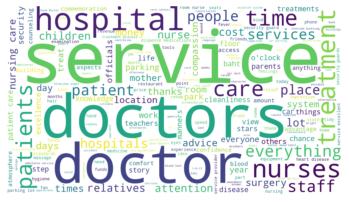

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in poshist.values]
    wordcloud = WordCloud(background_color='white',width=1600, height=900).generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
vizwordcloud(poshist)

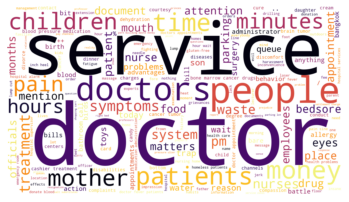

In [0]:
def vizwordcloud(df):
    tuples2 = [tuple(x) for x in neghist.values]
    wordcloud2 = WordCloud(background_color='white',width=1600, height=900,colormap=matplotlib.cm.inferno).generate_from_frequencies(dict(tuples2))
    plt.figure()
    plt.imshow(wordcloud2, interpolation="bilinear")
    plt.axis("off")
    plt.show()
vizwordcloud(neghist)

In [0]:
def plural2singular(word):
  if word == "doctors":
    return "doctor"
  elif word == "nurses":
    return "nurse"
  elif word == "clinics":
    return "clinic"
  elif word == "hospitals":
    return "hospital"
  elif word == "services":
    return "service"
  elif word == "staffs":
    return "staff"
  elif word == "treatments":
    return "treatment"
  elif word == "students":
    return "student"
  elif word == "prices":
    return "price"  
  else:
    return word

In [0]:
pos_words = [plural2singular(word) for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

neg_words = [plural2singular(word) for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

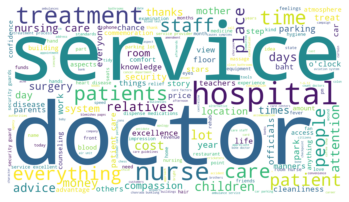

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in poshist.values]
    wordcloud = WordCloud(background_color='white',width=1600, height=900).generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
vizwordcloud(poshist)

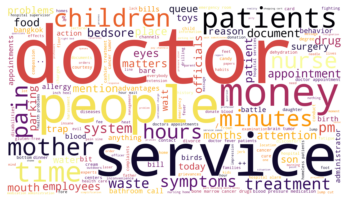

In [0]:
def vizwordcloud(df):
    tuples2 = [tuple(x) for x in neghist.values]
    wordcloud2 = WordCloud(background_color='white',width=1600, height=900,colormap=matplotlib.cm.inferno).generate_from_frequencies(dict(tuples2))
    plt.figure()
    plt.imshow(wordcloud2, interpolation="bilinear")
    plt.axis("off")
    plt.show()
vizwordcloud(neghist)

In [0]:
def groups(word):
    if word in ("doctor", "nurse", "student"):
        return "staff"
    elif word in ("hospital", "clinic", "equipment", "place",):
        return "infrastructure"
    elif word in ("service", "care", "treatment", "surgery", "disease", "medical care"):
        return "service"
    elif word in ("queue", "appointment","time"):
        return "process"
    elif word in ( "cost","price","money"):
        return "finance"
    else:
        return "others"

In [0]:
poshist["category"] = poshist["words"].apply(lambda x: groups(x))
poscount_siriraj = poshist.groupby("category").size().reset_index(name="#")
poscount_siriraj = poscount_siriraj[poscount_siriraj["category"] != "others"].reset_index(drop=True)

In [0]:
neghist["category"] = neghist["words"].apply(lambda x: groups(x))
negcount_siriraj = neghist.groupby("category").size().reset_index(name="#")
negcount_siriraj = negcount_siriraj[negcount_siriraj["category"] != "others"].reset_index(drop=True)

In [0]:
poscount_siriraj

,category,#
0,finance,3
1,infrastructure,3
2,process,3
3,service,5
4,staff,3


In [0]:
negcount_siriraj

,category,#
0,finance,1
1,infrastructure,2
2,process,3
3,service,3
4,staff,2


In [0]:
#Radar chart us matpoltlib below
#poscount_siriraj
#fig = px.line_polar(poscount_siriraj, r="#", theta="category", line_close=True)
#fig.update_traces(fill='toself')
#plot(fig)

In [0]:
#negcount_siriraj
#fig = px.line_polar(negcount_siriraj, r="#", theta="category", line_close=True)
#fig.update_traces(fill='toself')
#plot(fig)

# data vajira hospital

In [0]:
import pandas as pd

vajira = pd.read_csv("data_vajira_hospital_en.csv")
vajira = vajira.reset_index()
vajira = vajira.rename(columns={"index": "cid"})

In [0]:
from nltk import sent_tokenize

sentences = []
cids = []
for cid in vajira["cid"]:
    s = sent_tokenize(vajira.loc[cid, "en"])
    sentences = sentences + s
    cids = cids + [cid] * len(s)

In [0]:
def predict_sentiment(sentence):
  sa = SentimentIntensityAnalyzer()
  sentiment_distribution = sa.polarity_scores(sentence)
  score = sentiment_distribution.get("compound")
  
  if score >= 0.05:
    return "positive"
  elif score <= -0.05:
    return "negative"
  else:
    return "neutral"

In [0]:
sentiments = []
for sentence in tqdm_notebook(sentences, total=len(sentences)):
    sentiments.append(predict_sentiment(sentence))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [0]:
grammar = """NP: {<NN|NNS>+}
                 {<NN|NNS>+<CC><NN|NNS>+}"""
chunker = RegexpParser(grammar)
parse_trees = []
for sentence in sentences:
    parse_trees.append(chunker.parse(pos_tag(word_tokenize(sentence))))

In [0]:
def extract_np(parsed_tree):
    nps = []
    for subtree in parsed_tree.subtrees():
        if subtree.label() == 'NP':
            t = subtree
            t = " ".join(word for word, tag in t.leaves())
            nps.append(t)
    return nps

In [0]:
nps = []
for parse_tree in parse_trees:
    nps.append(extract_np(parse_tree))

In [0]:
df = pd.DataFrame({"cids": cids, 
                   "sentences": sentences, 
                   "sentiments": sentiments, 
                   "NP": nps})

In [0]:
df.head()

,cids,sentences,sentiments,NP
0,0,Wachira Hospital nurses go first.,neutral,[nurses]
1,0,Must register new patients But wait a simple q...,positive,"[patients, management unit]"
2,0,Initial symptoms questioning Sent to see a doc...,positive,"[symptoms, doctor, staff, trolley, doctor, nur..."
3,0,Even if patients do Then there is the follow-u...,negative,"[patients, time, queue]"
4,0,Thank you all for helping me during our doctor...,positive,"[doctors, pressure, weight]"


In [0]:
pos = df[df["sentiments"] == "positive"].reset_index(drop=True)
pos_words = sum(pos["NP"].tolist(), [])
pos_words = [word.lower() for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

In [0]:
neg = df[df["sentiments"] == "negative"].reset_index(drop=True)
neg_words = sum(neg["NP"].tolist(), [])
neg_words = [word.lower() for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

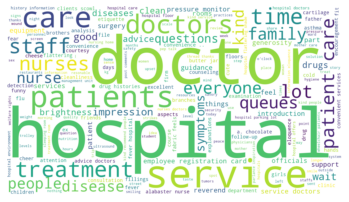

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in poshist.values]
    wordcloud = WordCloud(background_color='white',width=1600, height=900).generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()
vizwordcloud(poshist)

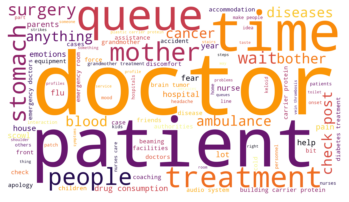

In [0]:
def vizwordcloud(df):
    tuples2 = [tuple(x) for x in neghist.values]
    wordcloud2 = WordCloud(background_color='white',width=1600, height=900,colormap=matplotlib.cm.inferno).generate_from_frequencies(dict(tuples2))
    plt.figure()
    plt.imshow(wordcloud2, interpolation="bilinear")
    plt.axis("off")
    plt.show()
vizwordcloud(neghist)

In [0]:
def plural2singular(word):
  if word == "doctors":
    return "doctor"
  elif word == "nurses":
    return "nurse"
  elif word == "clinics":
    return "clinic"
  elif word == "hospitals":
    return "hospital"
  elif word == "services":
    return "service"
  elif word == "staffs":
    return "staff"
  elif word == "treatments":
    return "treatment"
  elif word == "students":
    return "student"
  elif word == "prices":
    return "price"
  else:
    return word

In [0]:
pos_words = [plural2singular(word) for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

neg_words = [plural2singular(word) for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

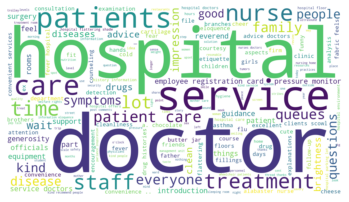

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in poshist.values]
    wordcloud = WordCloud(background_color='white',width=1600, height=900).generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()
vizwordcloud(poshist)

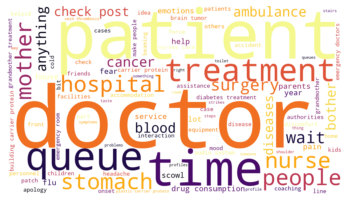

In [0]:
def vizwordcloud(df):
    tuples2 = [tuple(x) for x in neghist.values]
    wordcloud2 = WordCloud(background_color='white',width=1600, height=900,colormap=matplotlib.cm.inferno).generate_from_frequencies(dict(tuples2))
    plt.figure()
    plt.imshow(wordcloud2, interpolation="bilinear")
    plt.axis("off")
    plt.show()
vizwordcloud(neghist)

In [0]:
def groups(word):
    if word in ("doctor", "nurse", "student"):
        return "staff"
    elif word in ("hospital", "clinic", "equipment", "place"):
        return "infrastructure"
    elif word in ("service", "care", "treatment", "surgery", "disease", "medical care","equipment"):
        return "service"
    elif word in ("queue", "appointment","wait"):
        return "process"
    elif word in ("price", "claim","cost","consumption","account","welfare rights","check post"):
        return "finance"
    else:
        return "others"

In [0]:
poshist["category"] = poshist["words"].apply(lambda x: groups(x))
poscount_vajira = poshist.groupby("category").size().reset_index(name="#")
poscount_vajira = poscount_vajira[poscount_vajira["category"] != "others"].reset_index(drop=True)

In [0]:
neghist["category"] = neghist["words"].apply(lambda x: groups(x))
negcount_vajira = neghist.groupby("category").size().reset_index(name="#")
negcount_vajira = negcount_vajira[negcount_vajira["category"] != "others"].reset_index(drop=True)

In [0]:
poscount_vajira

,category,#
0,finance,1
1,infrastructure,4
2,process,1
3,service,5
4,staff,3


In [0]:
negcount_vajira

,category,#
0,finance,1
1,infrastructure,2
2,process,2
3,service,4
4,staff,2


In [0]:
#Radar Graph Use Matplotlib below
#poscount_vajira
#fig = px.line_polar(poscount_vajira, r="#", theta="category", line_close=True)
#fig.update_traces(fill='toself')
#plot(fig)

In [0]:
#negcount_vajira
#fig = px.line_polar(negcount_vajira, r="#", theta="category", line_close=True)
#fig.update_traces(fill='toself')
#plot(fig)

# Plot Radar Chart Hospital

In [0]:
Lanna = poscount_lanna['#']
Lanna

0    1
1    3
2    2
3    5
4    2
Name: #, dtype: int64

In [0]:
Siriraj= poscount_siriraj['#']
Siriraj

0    3
1    3
2    3
3    5
4    3
Name: #, dtype: int64

In [0]:
Vajira = poscount_vajira['#']
Vajira

0    1
1    4
2    1
3    5
4    3
Name: #, dtype: int64

# Radar Chart Postive Comment 

Lanna Hospital

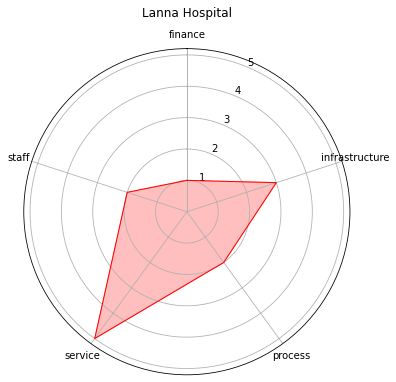

In [0]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['finance','infrastructure','process','service', 'staff']

values = Lanna.loc[0:].tolist()

num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='red', linewidth=1)

ax.fill(angles, values, color='red', alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles), labels)

ax.set_title('Lanna Hospital', y=1.08)

plt.savefig('Lanna_positive.png')

Siriraj Piyamahagarun Hospital

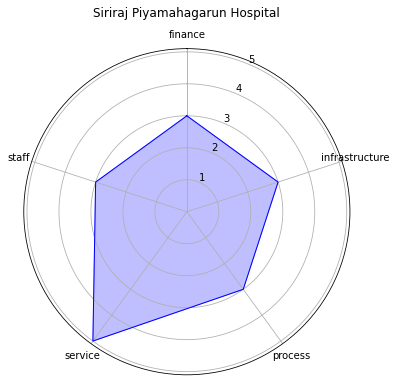

In [0]:
labels = ['finance','infrastructure','process','service', 'staff']

values = Siriraj.loc[0:].tolist()

num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='blue', linewidth=1)

ax.fill(angles, values, color='blue', alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles), labels)

ax.set_title('Siriraj Piyamahagarun Hospital', y=1.08)

plt.savefig('Siriraj_positive.png')

Vajira hospital

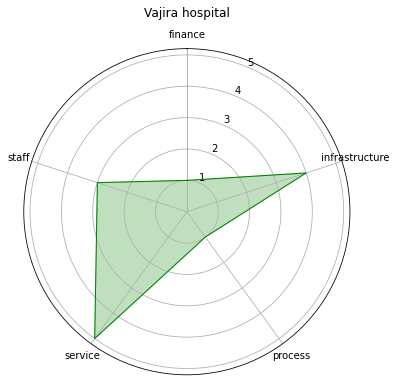

In [0]:
labels = ['finance','infrastructure','process','service', 'staff']

values = Vajira.loc[0:].tolist()

num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='green', linewidth=1)

ax.fill(angles, values, color='green', alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles), labels)

ax.set_title('Vajira hospital', y=1.08)

plt.savefig('Vajira_positive.png')

All hospital

Text(0.5, 1.08, 'Comparison Hospital')

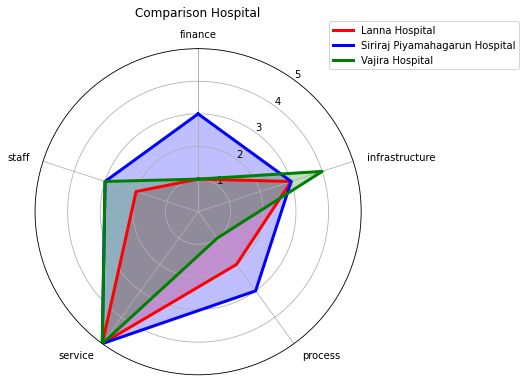

In [0]:
labels = ['finance','infrastructure','process','service', 'staff']

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# plot the radar chart.

values = Lanna.loc[0:].tolist()
values += values[:1]
ax.plot(angles, values, color='red', linewidth=3, label='Lanna Hospital')
ax.fill(angles, values, color='red', alpha=0.25)
  
values2 = Siriraj.loc[0:].tolist()
values2 += values2[:1]

ax.plot(angles, values2, color='blue', linewidth=3,label='Siriraj Piyamahagarun Hospital')
ax.fill(angles, values2, color='blue', alpha=0.25)

values3 = Vajira.loc[0:].tolist()
values3 += values3[:1]

ax.plot(angles, values3, color='green', linewidth=3,label='Vajira Hospital')
ax.fill(angles, values3, color='green', alpha=0.25)
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1))


# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')
ax.set_ylim(0, 5)
ax.set_rlabel_position(180 / num_vars)

# Add title.
ax.set_title('Comparison Hospital', y=1.08)

In [0]:
plt.savefig('radar_chart_positive.png')

<Figure size 432x288 with 0 Axes>

# Radar Chart Negative Comment 

In [0]:
NL = negcount_lanna['#']
NL

0    1
1    1
2    1
3    3
4    2
Name: #, dtype: int64

In [0]:
NS = negcount_siriraj['#']
NS

0    1
1    2
2    3
3    3
4    2
Name: #, dtype: int64

In [0]:
NV = negcount_vajira['#']
NV

0    1
1    2
2    2
3    4
4    2
Name: #, dtype: int64

Lanna hospital

Text(0.5, 1.08, 'Lanna Hospital - Negative')

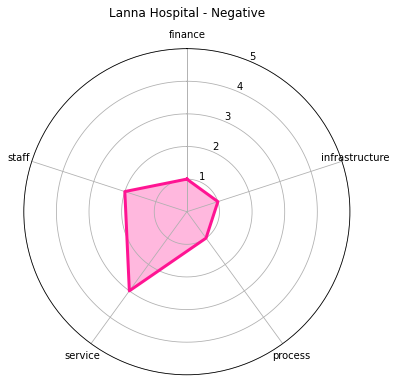

In [0]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['finance','infrastructure','process','service', 'staff']

values = NL.loc[0:].tolist()

num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='deeppink', linewidth=3)

ax.fill(angles, values, color='deeppink', alpha=0.30)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_ylim(0, 5)

ax.set_thetagrids(np.degrees(angles), labels)

ax.set_title('Lanna Hospital - Negative', y=1.08)

Siriraj Piyamahagarun hospital

Text(0.5, 1.08, 'Sirira Piyamahagarun Hospital - Negative')

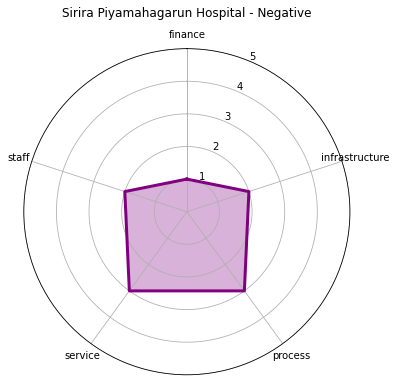

In [0]:
labels = ['finance','infrastructure','process','service', 'staff']

values = NS.loc[0:].tolist()

num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='purple', linewidth=3)

ax.fill(angles, values, color='purple', alpha=0.30)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_ylim(0, 5)

ax.set_thetagrids(np.degrees(angles), labels)

ax.set_title('Sirira Piyamahagarun Hospital - Negative', y=1.08)

Vajira hospital

Text(0.5, 1.08, 'Varija Hospital - Negative')

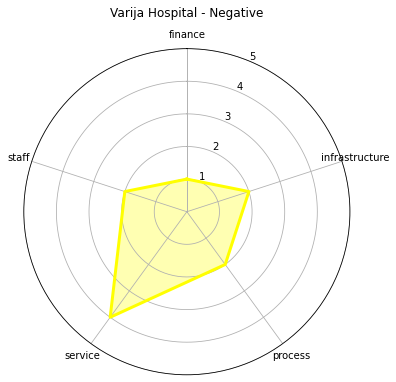

In [0]:
labels = ['finance','infrastructure','process','service', 'staff']

values = NV.loc[0:].tolist()

num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='yellow', linewidth=3)

ax.fill(angles, values, color='yellow', alpha=0.30)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_ylim(0, 5)

ax.set_thetagrids(np.degrees(angles), labels)

ax.set_title('Varija Hospital - Negative', y=1.08)

Text(0.5, 1.08, 'Comparison Hospital Negative')

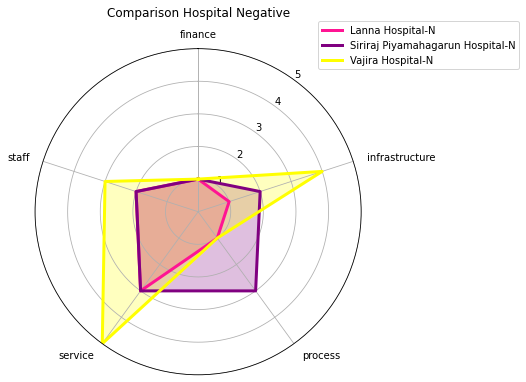

In [0]:
# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# plot the radar chart.

values = NL.loc[0:].tolist()
values += values[:1]
ax.plot(angles, values, color='deeppink', linewidth=3, label='Lanna Hospital-N')
ax.fill(angles, values, color='deeppink', alpha=0.25)
  
values2 = NS.loc[0:].tolist()
values2 += values2[:1]

ax.plot(angles, values2, color='purple', linewidth=3,label='Siriraj Piyamahagarun Hospital-N')
ax.fill(angles, values2, color='purple', alpha=0.25)

values3 = Vajira.loc[0:].tolist()
values3 += values3[:1]

ax.plot(angles, values3, color='yellow', linewidth=3,label='Vajira Hospital-N')
ax.fill(angles, values3, color='yellow', alpha=0.25)
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1))


# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')
ax.set_ylim(0, 5)
ax.set_rlabel_position(180 / num_vars)

# Add title.
ax.set_title('Comparison Hospital Negative', y=1.08)